In [22]:
suppressPackageStartupMessages({
  library(mgcv)
  library(arrow)
  library(dplyr)
  library(tictoc)
  library(lme4)
  library(glmmTMB)
  library(mgcv)
  library(gamm4)
})
options(width=1000)

set.seed(2024)

je <- read_parquet("je.parquet")

interactions_per_breed = 10000

# Sample farm_month_interaction instead of animals
je_sample_all <- je %>% distinct(farm_month_interaction) %>% sample_n(min(interactions_per_breed, n())) %>%
    inner_join(je, by = "farm_month_interaction")

# Check the number of rows in the combined dataframe
nrow(je_sample_all)

tic()
jersey <- gamm4(
  formula= milk ~ 1 + s(thi_mean_t0_3d) + days_in_milk + parity + year,
  random =~((1 | farm_month_interaction) + (1 | animalId)),
  data = je_sample_all,
  drop.unused.levels = TRUE,
  REML = TRUE,
  control = lmerControl(check.scaleX = "ignore", calc.derivs = FALSE, optimizer="bobyqa", optCtrl = list(maxfun = 10000)),
  verbose = 10,  
)
toc()

[1] 175346

iteration: 1
	x = (1.000000, 1.000000, 1.000000)
	f(x) = 938479.687311
iteration: 2
	x = (1.750000, 1.000000, 1.000000)
	f(x) = 949022.618334
iteration: 3
	x = (1.000000, 1.750000, 1.000000)
	f(x) = 942947.727489
iteration: 4
	x = (1.000000, 1.000000, 1.750000)
	f(x) = 938485.659413
iteration: 5
	x = (0.250000, 1.000000, 1.000000)
	f(x) = 954766.188517
iteration: 6
	x = (1.000000, 0.250000, 1.000000)
	f(x) = 942016.691087
iteration: 7
	x = (1.000000, 1.000000, 0.250000)
	f(x) = 938482.042606
iteration: 8
	x = (1.080279, 0.956384, 0.999780)
	f(x) = 939097.542679
iteration: 9
	x = (0.934305, 0.963818, 0.999796)
	f(x) = 937785.366194
iteration: 10
	x = (0.896318, 0.947557, 0.999570)
	f(x) = 937480.623972
iteration: 11
	x = (0.891694, 0.872700, 0.999493)
	f(x) = 937191.778473
iteration: 12
	x = (0.880773, 0.798501, 0.998989)
	f(x) = 936951.431595
iteration: 13
	x = (0.869378, 0.779243, 1.070573)
	f(x) = 936871.721820
iteration: 14
	x = (0.877070, 0.764209, 1.143647)
	f(x) = 936880.761691
i

In [26]:
summary(jersey$mer)


Correlation matrix not shown by default, as p = 28 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Linear mixed model fit by REML ['lmerMod']

REML criterion at convergence: 936688.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-6.2474 -0.5751 -0.0214  0.5569  6.6947 

Random effects:
 Groups                 Name              Variance Std.Dev.
 animalId               (Intercept)       5.957    2.441   
 farm_month_interaction (Intercept)       4.788    2.188   
 Xr                     s(thi_mean_t0_3d) 2.481    1.575   
 Residual                                 9.246    3.041   
Number of obs: 175346, groups:  animalId, 24170; farm_month_interaction, 10000; Xr, 8

Fixed effects:
                        Estimate Std. Error  t value
X(Intercept)           1.887e+01  1.971e-01   95.744
Xdays_in_milk         -3.015e-02  8.023e-05 -375.832
Xparityprimiparous    -2.372e+00  1.890e-02 -125.491
Xyear2000              8.064e-01  2.074e-01    3.889
Xyear2001              1.591e+00  1.991e-01    7.989
Xyear2002              1.832e+00  1.994e-01    9.190
Xyear2003              2

In [27]:
summary(jersey$gam)


Family: gaussian 
Link function: identity 

Formula:
milk ~ 1 + s(thi_mean_t0_3d) + days_in_milk + parity + year

Parametric coefficients:
                    Estimate Std. Error  t value Pr(>|t|)    
(Intercept)        1.887e+01  1.773e-01  106.465  < 2e-16 ***
days_in_milk      -3.015e-02  7.552e-05 -399.248  < 2e-16 ***
parityprimiparous -2.372e+00  1.746e-02 -135.909  < 2e-16 ***
year2000           8.064e-01  2.016e-01    4.000 6.33e-05 ***
year2001           1.591e+00  1.892e-01    8.409  < 2e-16 ***
year2002           1.832e+00  1.879e-01    9.750  < 2e-16 ***
year2003           2.423e+00  1.850e-01   13.099  < 2e-16 ***
year2004           3.105e+00  1.829e-01   16.972  < 2e-16 ***
year2005           3.252e+00  1.815e-01   17.918  < 2e-16 ***
year2006           3.510e+00  1.804e-01   19.461  < 2e-16 ***
year2007           3.254e+00  1.797e-01   18.108  < 2e-16 ***
year2008           3.549e+00  1.791e-01   19.820  < 2e-16 ***
year2009           3.852e+00  1.785e-01   21.572  < 2e

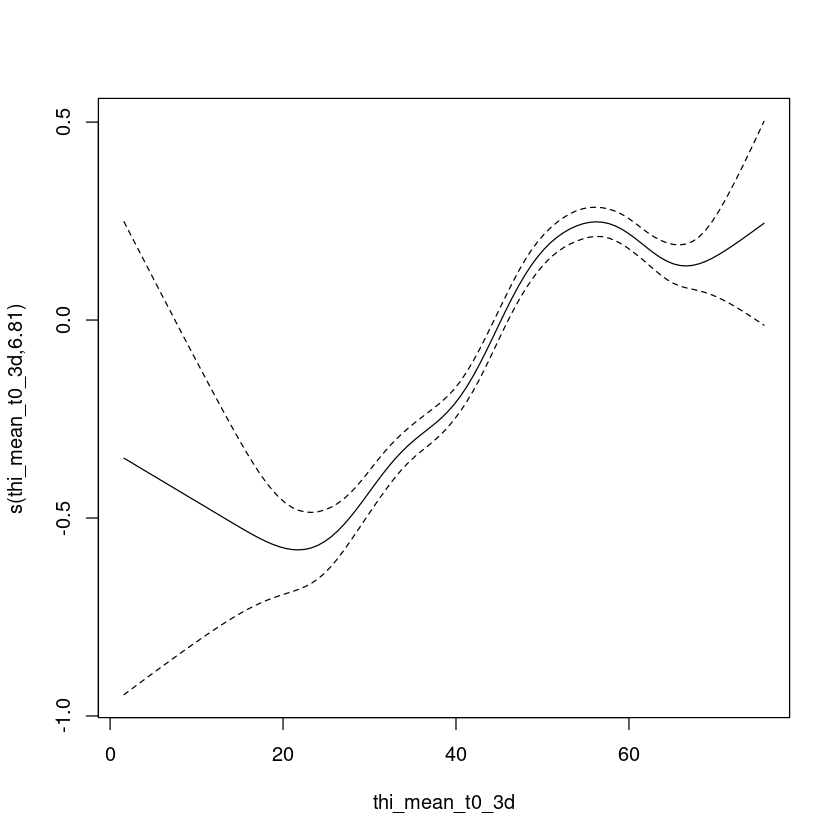

In [28]:
plot(jersey$gam)

In [29]:
suppressPackageStartupMessages({
  library(mgcv)
  library(arrow)
  library(dplyr)
  library(tictoc)
  library(lme4)
  library(glmmTMB)
  library(mgcv)
  library(gamm4)
})
options(width=1000)

set.seed(2024)

je <- read_parquet("je.parquet")

interactions_per_breed = 15000

# Sample farm_month_interaction instead of animals
je_sample_all <- je %>% distinct(farm_month_interaction) %>% sample_n(min(interactions_per_breed, n())) %>%
    inner_join(je, by = "farm_month_interaction")

# Check the number of rows in the combined dataframe
nrow(je_sample_all)

tic()
jersey <- gamm4(
  formula= milk ~ 1 + s(thi_mean_t0_3d) + days_in_milk + parity + year,
  random =~((1 | farm_month_interaction) + (1 | animalId)),
  data = je_sample_all,
  drop.unused.levels = TRUE,
  REML = TRUE,
  control = lmerControl(check.scaleX = "ignore", calc.derivs = FALSE, optimizer="bobyqa", optCtrl = list(maxfun = 10000)),
  verbose = 10,  
)
toc()

[1] 259088

iteration: 1
	x = (1.000000, 1.000000, 1.000000)
	f(x) = 1374413.612474
iteration: 2
	x = (1.750000, 1.000000, 1.000000)
	f(x) = 1385418.694483
iteration: 3
	x = (1.000000, 1.750000, 1.000000)
	f(x) = 1381535.031849
iteration: 4
	x = (1.000000, 1.000000, 1.750000)
	f(x) = 1374419.061788
iteration: 5
	x = (0.250000, 1.000000, 1.000000)
	f(x) = 1401866.255434
iteration: 6
	x = (1.000000, 0.250000, 1.000000)
	f(x) = 1378658.125357
iteration: 7
	x = (1.000000, 1.000000, 0.250000)
	f(x) = 1374419.604771
iteration: 8
	x = (1.160380, 0.905081, 1.000023)
	f(x) = 1375429.292229
iteration: 9
	x = (1.007579, 0.906122, 1.000021)
	f(x) = 1373794.213929
iteration: 10
	x = (0.974589, 0.771651, 1.000035)
	f(x) = 1372813.776776
iteration: 11
	x = (0.972159, 0.749816, 0.928325)
	f(x) = 1372717.708818
iteration: 12
	x = (0.959855, 0.740837, 0.854888)
	f(x) = 1372612.908340
iteration: 13
	x = (0.959438, 0.733826, 0.705053)
	f(x) = 1372589.252832
iteration: 14
	x = (0.955644, 0.732514, 0.555106)
	f(x) = 13

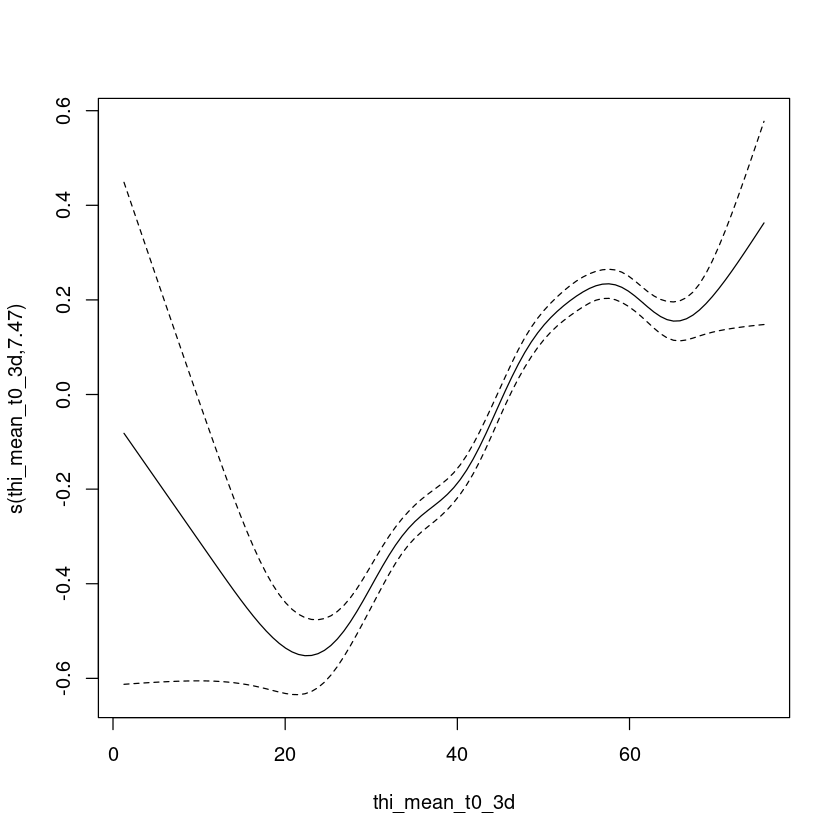


Correlation matrix not shown by default, as p = 28 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Linear mixed model fit by REML ['lmerMod']

REML criterion at convergence: 1372188

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-6.3698 -0.5782 -0.0210  0.5636  6.9311 

Random effects:
 Groups                 Name              Variance Std.Dev.
 animalId               (Intercept)       6.703    2.589   
 farm_month_interaction (Intercept)       4.061    2.015   
 Xr                     s(thi_mean_t0_3d) 3.598    1.897   
 Residual                                 9.052    3.009   
Number of obs: 259088, groups:  animalId, 25433; farm_month_interaction, 15000; Xr, 8

Fixed effects:
                        Estimate Std. Error  t value
X(Intercept)           1.877e+01  1.638e-01  114.610
Xdays_in_milk         -3.062e-02  6.449e-05 -474.849
Xparityprimiparous    -2.299e+00  1.574e-02 -146.077
Xyear2000              8.206e-01  1.698e-01    4.832
Xyear2001              1.603e+00  1.636e-01    9.798
Xyear2002              1.848e+00  1.639e-01   11.280
Xyear2003              2.


Family: gaussian 
Link function: identity 

Formula:
milk ~ 1 + s(thi_mean_t0_3d) + days_in_milk + parity + year

Parametric coefficients:
                    Estimate Std. Error  t value Pr(>|t|)    
(Intercept)        1.877e+01  1.454e-01  129.071  < 2e-16 ***
days_in_milk      -3.062e-02  6.063e-05 -505.051  < 2e-16 ***
parityprimiparous -2.299e+00  1.395e-02 -164.775  < 2e-16 ***
year2000           8.206e-01  1.640e-01    5.002 5.68e-07 ***
year2001           1.603e+00  1.540e-01   10.406  < 2e-16 ***
year2002           1.848e+00  1.530e-01   12.083  < 2e-16 ***
year2003           2.359e+00  1.507e-01   15.660  < 2e-16 ***
year2004           2.977e+00  1.492e-01   19.959  < 2e-16 ***
year2005           3.214e+00  1.482e-01   21.687  < 2e-16 ***
year2006           3.488e+00  1.475e-01   23.648  < 2e-16 ***
year2007           3.312e+00  1.469e-01   22.537  < 2e-16 ***
year2008           3.514e+00  1.464e-01   23.998  < 2e-16 ***
year2009           3.849e+00  1.461e-01   26.341  < 2e

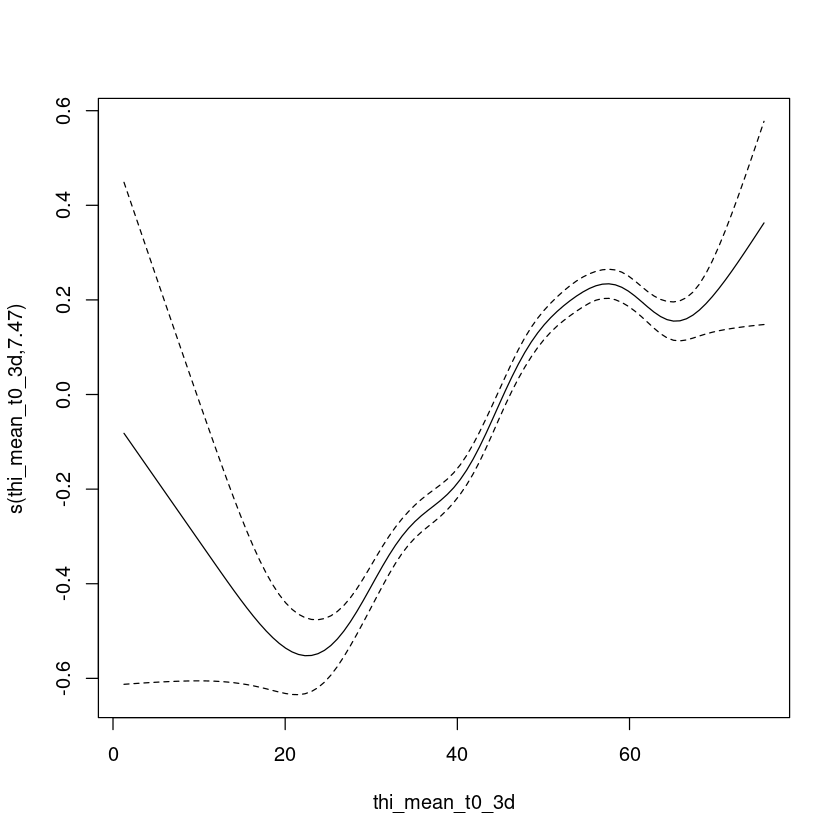

In [34]:
summary(jersey$mer)
summary(jersey$gam)
plot(jersey$gam)

[1] 426397

iteration: 1
	x = (1.000000, 1.000000, 1.000000)
	f(x) = 2243601.896771
iteration: 2
	x = (1.750000, 1.000000, 1.000000)
	f(x) = 2254540.009422
iteration: 3
	x = (1.000000, 1.750000, 1.000000)
	f(x) = 2256561.039061
iteration: 4
	x = (1.000000, 1.000000, 1.750000)
	f(x) = 2243609.151015
iteration: 5
	x = (0.250000, 1.000000, 1.000000)
	f(x) = 2290444.848857
iteration: 6
	x = (1.000000, 0.250000, 1.000000)
	f(x) = 2247885.690062
iteration: 7
	x = (1.000000, 1.000000, 0.250000)
	f(x) = 2243604.727891
iteration: 8
	x = (1.233023, 0.811328, 0.999875)
	f(x) = 2243393.141973
iteration: 9
	x = (1.270104, 0.900653, 0.999855)
	f(x) = 2245099.678924
iteration: 10
	x = (1.056600, 0.747837, 0.999906)
	f(x) = 2240789.998918
iteration: 11
	x = (0.682274, 0.725363, 0.999711)
	f(x) = 2242623.905836
iteration: 12
	x = (1.062261, 0.722615, 1.074913)
	f(x) = 2240615.568205
iteration: 13
	x = (1.040813, 0.699585, 1.259753)
	f(x) = 2240282.530201
iteration: 14
	x = (1.032919, 0.699105, 1.634670)
	f(x) = 22


Correlation matrix not shown by default, as p = 28 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Linear mixed model fit by REML ['lmerMod']

REML criterion at convergence: 2239491

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-7.7490 -0.5840 -0.0180  0.5705  7.2154 

Random effects:
 Groups                 Name              Variance Std.Dev.
 animalId               (Intercept)       7.802    2.793   
 farm_month_interaction (Intercept)       3.254    1.804   
 Xr                     s(thi_mean_t0_3d) 2.138    1.462   
 Residual                                 9.016    3.003   
Number of obs: 426397, groups:  animalId, 26201; farm_month_interaction, 25000; Xr, 8

Fixed effects:
                        Estimate Std. Error  t value
X(Intercept)           1.852e+01  1.289e-01  143.689
Xdays_in_milk         -3.096e-02  4.911e-05 -630.445
Xparityprimiparous    -2.174e+00  1.264e-02 -171.952
Xyear2000              6.836e-01  1.306e-01    5.233
Xyear2001              1.474e+00  1.263e-01   11.664
Xyear2002              1.704e+00  1.266e-01   13.454
Xyear2003              2.


Family: gaussian 
Link function: identity 

Formula:
milk ~ 1 + s(thi_mean_t0_3d) + days_in_milk + parity + year

Parametric coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       18.5153691  0.1104744  167.60  < 2e-16 ***
days_in_milk      -0.0309614  0.0000462 -670.11  < 2e-16 ***
parityprimiparous -2.1740861  0.0107037 -203.12  < 2e-16 ***
year2000           0.6835995  0.1247392    5.48 4.25e-08 ***
year2001           1.4735227  0.1162968   12.67  < 2e-16 ***
year2002           1.7036271  0.1155738   14.74  < 2e-16 ***
year2003           2.2166284  0.1137988   19.48  < 2e-16 ***
year2004           2.8045240  0.1126718   24.89  < 2e-16 ***
year2005           2.9839742  0.1119536   26.65  < 2e-16 ***
year2006           3.3296150  0.1113430   29.90  < 2e-16 ***
year2007           3.1365773  0.1109646   28.27  < 2e-16 ***
year2008           3.3923573  0.1105078   30.70  < 2e-16 ***
year2009           3.7146665  0.1103316   33.67  < 2e-16 ***
year20

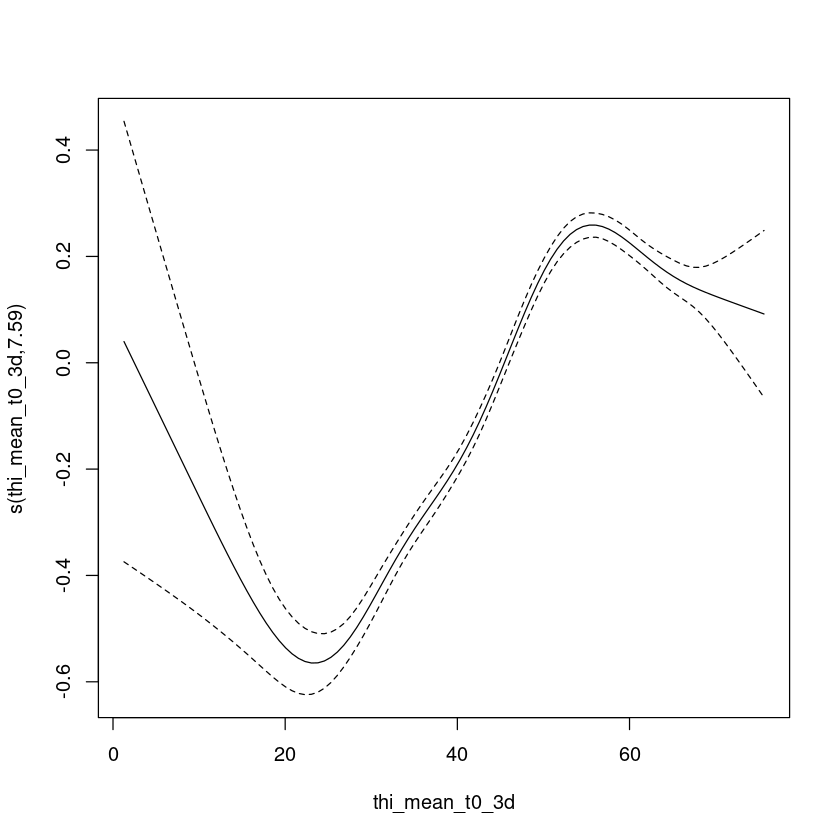

In [35]:
suppressPackageStartupMessages({
  library(mgcv)
  library(arrow)
  library(dplyr)
  library(tictoc)
  library(lme4)
  library(glmmTMB)
  library(mgcv)
  library(gamm4)
})
options(width=1000)

set.seed(2024)

je <- read_parquet("je.parquet")

interactions_per_breed = 25000

# Sample farm_month_interaction instead of animals
je_sample_all <- je %>% distinct(farm_month_interaction) %>% sample_n(min(interactions_per_breed, n())) %>%
    inner_join(je, by = "farm_month_interaction")

# Check the number of rows in the combined dataframe
nrow(je_sample_all)

tic()
jersey <- gamm4(
  formula= milk ~ 1 + s(thi_mean_t0_3d) + days_in_milk + parity + year,
  random =~((1 | farm_month_interaction) + (1 | animalId)),
  data = je_sample_all,
  drop.unused.levels = TRUE,
  REML = TRUE,
  control = lmerControl(check.scaleX = "ignore", calc.derivs = FALSE, optimizer="bobyqa", optCtrl = list(maxfun = 10000)),
  verbose = 10,  
)
toc()

summary(jersey$mer)
summary(jersey$gam)
plot(jersey$gam)

[1] 660110

iteration: 1
	x = (1.000000, 1.000000, 1.000000)
	f(x) = 3454657.826675
iteration: 2
	x = (1.750000, 1.000000, 1.000000)
	f(x) = 3476460.116330
iteration: 3
	x = (1.000000, 1.750000, 1.000000)
	f(x) = 3464894.430543
iteration: 4
	x = (1.000000, 1.000000, 1.750000)
	f(x) = 3454664.832246
iteration: 5
	x = (0.250000, 1.000000, 1.000000)
	f(x) = 3457462.560892
iteration: 6
	x = (1.000000, 0.250000, 1.000000)
	f(x) = 3524831.804468
iteration: 7
	x = (1.000000, 1.000000, 0.250000)
	f(x) = 3454662.920154
iteration: 8
	x = (0.710486, 1.279522, 0.999962)
	f(x) = 3450425.007899
iteration: 9
	x = (0.662457, 1.286839, 0.251537)
	f(x) = 3449780.372157
iteration: 10
	x = (0.872955, 1.255152, 0.000000)
	f(x) = 3454083.918034
iteration: 11
	x = (0.553703, 1.315523, 0.176691)
	f(x) = 3449246.867628
iteration: 12
	x = (0.428429, 1.181183, 0.139068)
	f(x) = 3448836.375478
iteration: 13
	x = (0.322537, 1.278568, 0.259315)
	f(x) = 3453578.243709
iteration: 14
	x = (0.397612, 1.231389, 0.092650)
	f(x) = 34


Correlation matrix not shown by default, as p = 28 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Linear mixed model fit by REML ['lmerMod']

REML criterion at convergence: 3446744

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-7.7486 -0.5869 -0.0176  0.5774  7.9600 

Random effects:
 Groups                 Name              Variance Std.Dev.
 farm_month_interaction (Intercept)       2.756    1.660   
 animalId               (Intercept)       8.952    2.992   
 Xr                     s(thi_mean_t0_3d) 2.451    1.566   
 Residual                                 9.044    3.007   
Number of obs: 660110, groups:  farm_month_interaction, 39223; animalId, 26641; Xr, 8

Fixed effects:
                        Estimate Std. Error  t value
X(Intercept)           1.806e+01  1.048e-01  172.342
Xdays_in_milk         -3.127e-02  3.894e-05 -802.898
Xparityprimiparous    -2.081e+00  1.048e-02 -198.495
Xyear2000              6.272e-01  1.036e-01    6.055
Xyear2001              1.459e+00  1.007e-01   14.486
Xyear2002              1.755e+00  1.010e-01   17.374
Xyear2003              2.


Family: gaussian 
Link function: identity 

Formula:
milk ~ 1 + s(thi_mean_t0_3d) + days_in_milk + parity + year

Parametric coefficients:
                    Estimate Std. Error  t value Pr(>|t|)    
(Intercept)        1.806e+01  8.728e-02  206.980  < 2e-16 ***
days_in_milk      -3.127e-02  3.658e-05 -854.736  < 2e-16 ***
parityprimiparous -2.081e+00  8.516e-03 -244.310  < 2e-16 ***
year2000           6.272e-01  9.753e-02    6.431 1.27e-10 ***
year2001           1.459e+00  9.088e-02   16.056  < 2e-16 ***
year2002           1.755e+00  9.035e-02   19.425  < 2e-16 ***
year2003           2.255e+00  8.911e-02   25.308  < 2e-16 ***
year2004           2.798e+00  8.820e-02   31.721  < 2e-16 ***
year2005           3.061e+00  8.757e-02   34.951  < 2e-16 ***
year2006           3.411e+00  8.712e-02   39.152  < 2e-16 ***
year2007           3.240e+00  8.680e-02   37.326  < 2e-16 ***
year2008           3.513e+00  8.647e-02   40.628  < 2e-16 ***
year2009           3.834e+00  8.626e-02   44.446  < 2e

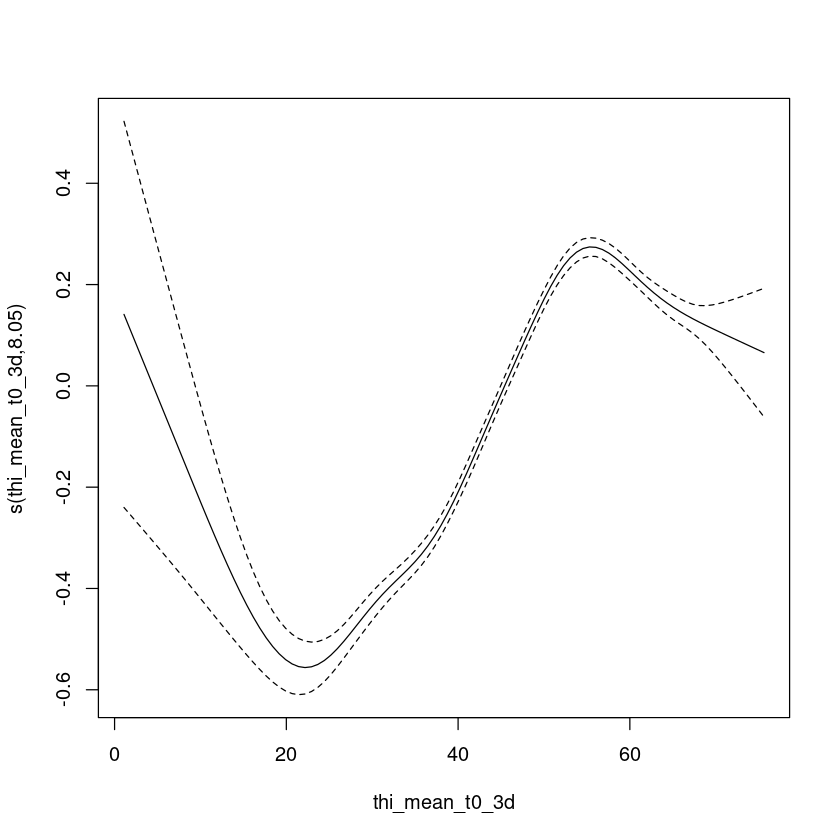

In [1]:
suppressPackageStartupMessages({
  library(mgcv)
  library(arrow)
  library(dplyr)
  library(tictoc)
  library(lme4)
  library(glmmTMB)
  library(mgcv)
  library(gamm4)
})
options(width=1000)

set.seed(2024)

je <- read_parquet("je.parquet")

interactions_per_breed = 40000

# Sample farm_month_interaction instead of animals
je_sample_all <- je %>% distinct(farm_month_interaction) %>% sample_n(min(interactions_per_breed, n())) %>%
    inner_join(je, by = "farm_month_interaction")

# Check the number of rows in the combined dataframe
nrow(je_sample_all)

tic()
jersey <- gamm4(
  formula= milk ~ 1 + s(thi_mean_t0_3d) + days_in_milk + parity + year,
  random =~((1 | farm_month_interaction) + (1 | animalId)),
  data = je_sample_all,
  drop.unused.levels = TRUE,
  REML = TRUE,
  control = lmerControl(check.scaleX = "ignore", calc.derivs = FALSE, optimizer="bobyqa", optCtrl = list(maxfun = 10000)),
  verbose = 10,  
)
toc()

summary(jersey$mer)
summary(jersey$gam)
plot(jersey$gam)


Correlation matrix not shown by default, as p = 28 > 12.
Use print(obj, correlation=TRUE)  or
    vcov(obj)        if you need it




Linear mixed model fit by REML ['lmerMod']

REML criterion at convergence: 3446744

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-7.7486 -0.5869 -0.0176  0.5774  7.9600 

Random effects:
 Groups                 Name              Variance Std.Dev.
 farm_month_interaction (Intercept)       2.756    1.660   
 animalId               (Intercept)       8.952    2.992   
 Xr                     s(thi_mean_t0_3d) 2.451    1.566   
 Residual                                 9.044    3.007   
Number of obs: 660110, groups:  farm_month_interaction, 39223; animalId, 26641; Xr, 8

Fixed effects:
                        Estimate Std. Error  t value
X(Intercept)           1.806e+01  1.048e-01  172.342
Xdays_in_milk         -3.127e-02  3.894e-05 -802.898
Xparityprimiparous    -2.081e+00  1.048e-02 -198.495
Xyear2000              6.272e-01  1.036e-01    6.055
Xyear2001              1.459e+00  1.007e-01   14.486
Xyear2002              1.755e+00  1.010e-01   17.374
Xyear2003              2.


Family: gaussian 
Link function: identity 

Formula:
milk ~ 1 + s(thi_mean_t0_3d) + days_in_milk + parity + year

Parametric coefficients:
                    Estimate Std. Error  t value Pr(>|t|)    
(Intercept)        1.806e+01  8.728e-02  206.980  < 2e-16 ***
days_in_milk      -3.127e-02  3.658e-05 -854.736  < 2e-16 ***
parityprimiparous -2.081e+00  8.516e-03 -244.310  < 2e-16 ***
year2000           6.272e-01  9.753e-02    6.431 1.27e-10 ***
year2001           1.459e+00  9.088e-02   16.056  < 2e-16 ***
year2002           1.755e+00  9.035e-02   19.425  < 2e-16 ***
year2003           2.255e+00  8.911e-02   25.308  < 2e-16 ***
year2004           2.798e+00  8.820e-02   31.721  < 2e-16 ***
year2005           3.061e+00  8.757e-02   34.951  < 2e-16 ***
year2006           3.411e+00  8.712e-02   39.152  < 2e-16 ***
year2007           3.240e+00  8.680e-02   37.326  < 2e-16 ***
year2008           3.513e+00  8.647e-02   40.628  < 2e-16 ***
year2009           3.834e+00  8.626e-02   44.446  < 2e

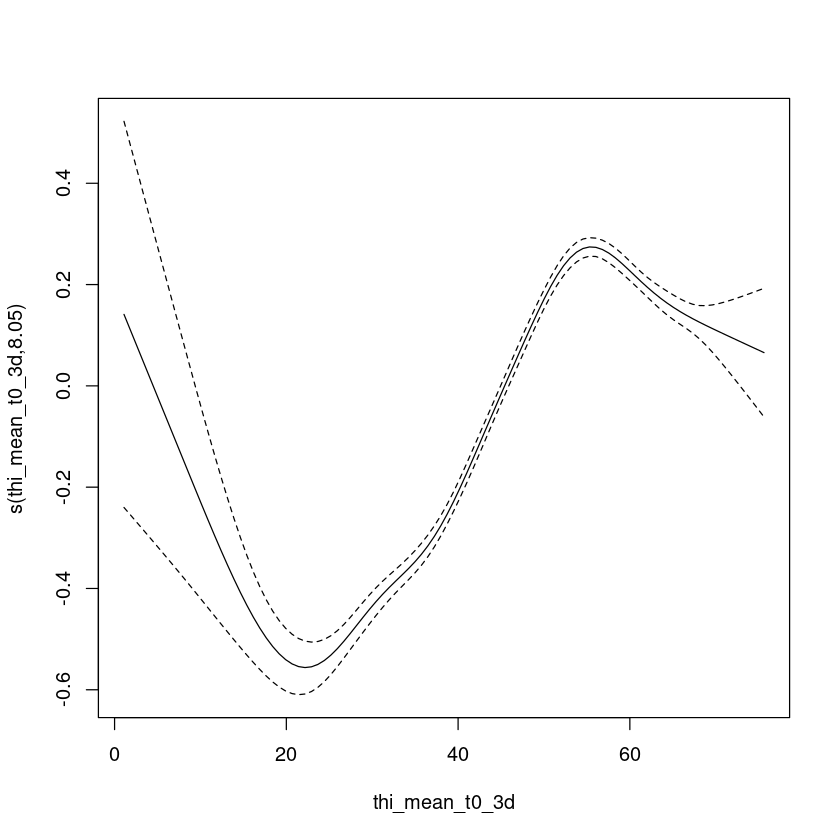

In [2]:
summary(jersey$mer)
summary(jersey$gam)
plot(jersey$gam)

In [ ]:
suppressPackageStartupMessages({
  library(mgcv)
  library(arrow)
  library(dplyr)
  library(tictoc)
  library(lme4)
  library(glmmTMB)
  library(mgcv)
  library(gamm4)
})
options(width=1000)

set.seed(2024)

ho <- read_parquet("ho.parquet")

interactions_per_breed = 40000

# Sample farm_month_interaction instead of animals
ho_sample_all <- ho %>% distinct(farm_month_interaction) %>% sample_n(min(interactions_per_breed, n())) %>%
    inner_join(ho, by = "farm_month_interaction")

# Check the number of rows in the combined dataframe
nrow(ho_sample_all)

tic()
holstein <- gamm4(
  formula= milk ~ 1 + s(thi_mean_t0_3d) + days_in_milk + parity + year,
  random =~((1 | farm_month_interaction) + (1 | animalId)),
  data = ho_sample_all,
  drop.unused.levels = TRUE,
  REML = TRUE,
  control = lmerControl(check.scaleX = "ignore", calc.derivs = FALSE, optimizer="bobyqa", optCtrl = list(maxfun = 10000)),
  verbose = 10,  
)
toc()

summary(holstein$mer)
summary(holstein$gam)
plot(holstein$gam)

[1] 3628316